<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/tf2_Basical_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

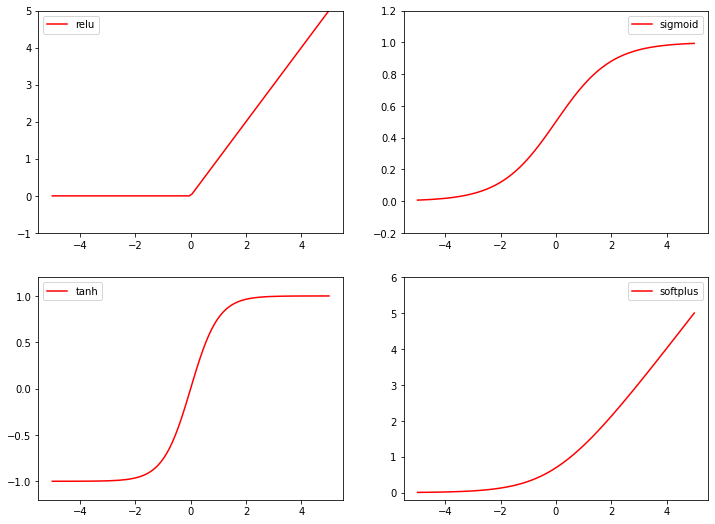

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# fake data
x = np.linspace(-5, 5, 100)

# following are popular activation functions
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)
# y_softmax = tf.nn.softmax(x)  softmax is a special kind of activation function, it is about probability

# plt to visualize these activation function
plt.figure(1, figsize=(12, 9))
plt.subplot(221)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

In [2]:
import tensorflow as tf
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
  t.watch(x)
  y = x*x
  z = y*y

print(t.gradient(z,x))
print(t.gradient(y,x))


tf.Tensor(108.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [3]:
def f(x, y):
    output = 1.0
    for i in range(y):
        if i > 1 and i < 5:
            output = tf.multiply(output, x)
            print(output)
    return output

def grad(x, y):
    with tf.GradientTape() as t:
        t.watch(x)
        out = f(x, y)
    return t.gradient(out, x)

x = tf.convert_to_tensor(2.0)



In [4]:
grad(x, 5).numpy()

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)


12.0

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
# Define model and Loss

class Model(object):
    def __init__(self):
        self.W = tf.Variable(10.0)
        self.b = tf.Variable(-5.0)

    def __call__(self, inputs):
        return self.W * inputs + self.b


def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))



In [7]:
model = Model()


In [8]:
TRUE_W = 3.0
TRUE_b = 2.0

In [9]:
# Obtain training data, Let's synthesize the training data with some noise.

NUM_EXAMPLES = 1000
inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

In [10]:
# Before we train the model let's visualize where the model stands right now.
# We'll plot the model's predictions in red and the training data in blue.

def plot(epoch):
    plt.scatter(inputs, outputs, c='b')
    plt.scatter(inputs, model(inputs), c='r')
    plt.title("epoch %2d, loss = %s" %(epoch, str(compute_loss(outputs, model(inputs)).numpy())))
    plt.legend()
    plt.draw()
    plt.ion()
    plt.pause(1)
    plt.close()

=> epoch  1: w_true= 3.00, w_pred= 8.58; b_true= 2.00, b_pred= -3.60, loss= 99.30


No handles with labels found to put in legend.


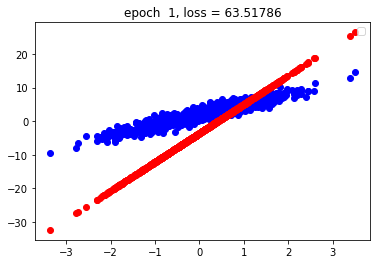

No handles with labels found to put in legend.


=> epoch  2: w_true= 3.00, w_pred= 7.45; b_true= 2.00, b_pred= -2.48, loss= 63.52
=> epoch  3: w_true= 3.00, w_pred= 6.55; b_true= 2.00, b_pred= -1.58, loss= 40.76
=> epoch  4: w_true= 3.00, w_pred= 5.83; b_true= 2.00, b_pred= -0.87, loss= 26.29
=> epoch  5: w_true= 3.00, w_pred= 5.26; b_true= 2.00, b_pred= -0.30, loss= 17.08
=> epoch  6: w_true= 3.00, w_pred= 4.81; b_true= 2.00, b_pred= 0.16, loss= 11.22
=> epoch  7: w_true= 3.00, w_pred= 4.45; b_true= 2.00, b_pred= 0.52, loss= 7.50
=> epoch  8: w_true= 3.00, w_pred= 4.16; b_true= 2.00, b_pred= 0.81, loss= 5.13
=> epoch  9: w_true= 3.00, w_pred= 3.93; b_true= 2.00, b_pred= 1.04, loss= 3.62
=> epoch 10: w_true= 3.00, w_pred= 3.75; b_true= 2.00, b_pred= 1.23, loss= 2.67
=> epoch 11: w_true= 3.00, w_pred= 3.60; b_true= 2.00, b_pred= 1.38, loss= 2.06


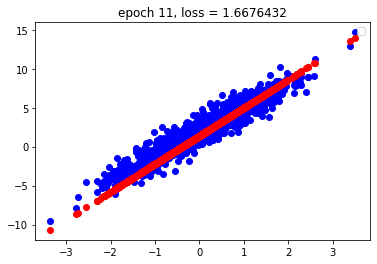

No handles with labels found to put in legend.


=> epoch 12: w_true= 3.00, w_pred= 3.48; b_true= 2.00, b_pred= 1.50, loss= 1.67
=> epoch 13: w_true= 3.00, w_pred= 3.39; b_true= 2.00, b_pred= 1.59, loss= 1.42
=> epoch 14: w_true= 3.00, w_pred= 3.32; b_true= 2.00, b_pred= 1.67, loss= 1.26
=> epoch 15: w_true= 3.00, w_pred= 3.26; b_true= 2.00, b_pred= 1.73, loss= 1.16
=> epoch 16: w_true= 3.00, w_pred= 3.21; b_true= 2.00, b_pred= 1.78, loss= 1.10
=> epoch 17: w_true= 3.00, w_pred= 3.18; b_true= 2.00, b_pred= 1.81, loss= 1.06
=> epoch 18: w_true= 3.00, w_pred= 3.15; b_true= 2.00, b_pred= 1.85, loss= 1.03
=> epoch 19: w_true= 3.00, w_pred= 3.12; b_true= 2.00, b_pred= 1.87, loss= 1.02
=> epoch 20: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 1.89, loss= 1.01
=> epoch 21: w_true= 3.00, w_pred= 3.09; b_true= 2.00, b_pred= 1.91, loss= 1.00


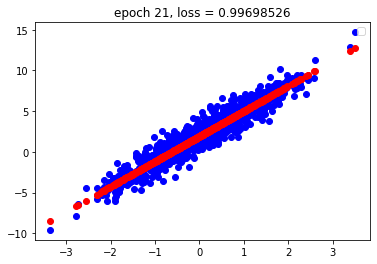

=> epoch 22: w_true= 3.00, w_pred= 3.08; b_true= 2.00, b_pred= 1.92, loss= 1.00
=> epoch 23: w_true= 3.00, w_pred= 3.07; b_true= 2.00, b_pred= 1.93, loss= 0.99
=> epoch 24: w_true= 3.00, w_pred= 3.06; b_true= 2.00, b_pred= 1.94, loss= 0.99
=> epoch 25: w_true= 3.00, w_pred= 3.05; b_true= 2.00, b_pred= 1.94, loss= 0.99
=> epoch 26: w_true= 3.00, w_pred= 3.05; b_true= 2.00, b_pred= 1.95, loss= 0.99
=> epoch 27: w_true= 3.00, w_pred= 3.05; b_true= 2.00, b_pred= 1.95, loss= 0.99
=> epoch 28: w_true= 3.00, w_pred= 3.04; b_true= 2.00, b_pred= 1.95, loss= 0.99
=> epoch 29: w_true= 3.00, w_pred= 3.04; b_true= 2.00, b_pred= 1.96, loss= 0.99
=> epoch 30: w_true= 3.00, w_pred= 3.04; b_true= 2.00, b_pred= 1.96, loss= 0.99


In [11]:
# Define a training loop
learning_rate = 0.1
for epoch in range(30):
    with tf.GradientTape() as tape:
        loss = compute_loss(outputs, model(inputs))

    dW, db = tape.gradient(loss, [model.W, model.b])

    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

    print("=> epoch %2d: w_true= %.2f, w_pred= %.2f; b_true= %.2f, b_pred= %.2f, loss= %.2f" %(
          epoch+1, TRUE_W, model.W.numpy(), TRUE_b, model.b.numpy(), loss.numpy()))
    if (epoch) % 10 == 0: plot(epoch + 1)

In [12]:
import numpy as np
import tensorflow as tf

In [13]:
# Parameters
learning_rate = 0.001
training_epochs = 6
batch_size = 600

# Import MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

train_dataset = (
    tf.data.Dataset.from_tensor_slices((tf.reshape(x_train, [-1, 784]), y_train))
    .batch(batch_size)
    .shuffle(1000)
)

train_dataset = (
    train_dataset.map(lambda x, y:
                      (tf.divide(tf.cast(x, tf.float32), 255.0),
                       tf.reshape(tf.one_hot(y, 10), (-1, 10))))
)

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [15]:
# Construct model
model = lambda x: tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
# Minimize error using cross entropy
compute_loss = lambda true, pred: tf.reduce_mean(tf.reduce_sum(tf.losses.binary_crossentropy(true, pred), axis=-1))
# caculate accuracy
compute_accuracy = lambda true, pred: tf.reduce_mean(tf.keras.metrics.categorical_accuracy(true, pred))
# Gradient Descent
optimizer = tf.optimizers.Adam(learning_rate)

for epoch in range(training_epochs):
    for i, (x_, y_) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            pred = model(x_)
            loss = compute_loss(y_, pred)
        acc = compute_accuracy(y_, pred)
        grads = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(grads, [W, b]))
        print("=> loss %.2f acc %.2f" %(loss.numpy(), acc.numpy()))

=> loss 195.05 acc 0.09
=> loss 191.96 acc 0.54
=> loss 188.48 acc 0.63
=> loss 185.88 acc 0.55
=> loss 182.77 acc 0.62
=> loss 178.99 acc 0.67
=> loss 176.60 acc 0.61
=> loss 172.74 acc 0.65
=> loss 172.46 acc 0.62
=> loss 168.34 acc 0.67
=> loss 166.38 acc 0.67
=> loss 162.71 acc 0.68
=> loss 158.49 acc 0.68
=> loss 156.59 acc 0.66
=> loss 152.75 acc 0.73
=> loss 152.18 acc 0.75
=> loss 148.16 acc 0.71
=> loss 150.90 acc 0.72
=> loss 146.62 acc 0.74
=> loss 146.44 acc 0.74
=> loss 142.41 acc 0.73
=> loss 147.35 acc 0.72
=> loss 142.15 acc 0.77
=> loss 138.93 acc 0.75
=> loss 134.77 acc 0.75
=> loss 133.31 acc 0.80
=> loss 121.80 acc 0.82
=> loss 128.12 acc 0.75
=> loss 129.45 acc 0.77
=> loss 126.26 acc 0.77
=> loss 123.54 acc 0.79
=> loss 118.95 acc 0.77
=> loss 118.94 acc 0.78
=> loss 115.95 acc 0.80
=> loss 110.38 acc 0.83
=> loss 121.22 acc 0.73
=> loss 113.23 acc 0.78
=> loss 105.42 acc 0.83
=> loss 113.76 acc 0.76
=> loss 113.46 acc 0.75
=> loss 104.79 acc 0.80
=> loss 111.83 a

In [33]:
tf.cast(tf.one_hot([0,1,2,3,3,2,4,2,1], 5), tf.int64)

<tf.Tensor: shape=(9, 5), dtype=int64, numpy=
array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])>

Multilayer Perceptron Layer

Subsequent work with multilayer perceptrons has shown that they are capable of approximating an XOR operator as well as many other non-linear functions.

A multilayer perceptron (MLP) is a deep, artificial neural network. It is composed of more than one perceptron. They are composed of an input layer to receive the signal, an output layer that makes a decision or prediction about the input, and in between those two, an arbitrary number of hidden layers that are the true computational engine of the MLP. MLPs with one hidden layer are capable of approximating any continuous function.

Multilayer perceptrons are often applied to supervised learning problems3: they train on a set of input-output pairs and learn to model the correlation (or dependencies) between those inputs and outputs. Training involves adjusting the parameters, or the weights and biases, of the model in order to minimize error. Backpropagation is used to make those weigh and bias adjustments relative to the error, and the error itself can be measured in a variety of ways, including by root mean squared error (RMSE).

In [18]:
import numpy as np
import tensorflow as tf
# Parameters
learning_rate = 0.001
training_steps = 3000
batch_size = 100
display_step = 300

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])

# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.



In [25]:
print(tf.shape(x_train))
print(tf.shape(y_train))

tf.Tensor([60000   784], shape=(2,), dtype=int32)
tf.Tensor([60000], shape=(1,), dtype=int32)


In [37]:
print(y_train[0])

5


In [26]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [30]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [31]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_classes]))
}

In [32]:
# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    layer_2 = tf.nn.sigmoid(layer_2)
    output = tf.matmul(layer_2, weights['out']) + biases['out']
    return tf.nn.softmax(output)

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=10)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [34]:
# Optimization process. 
def train_step(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as tape:
        pred = multilayer_perceptron(x)
        loss = cross_entropy(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = list(weights.values()) + list(biases.values())

    # Compute gradients.
    gradients = tape.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [35]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):  # start 1
    # Run the optimization to update W and b values.
    train_step(batch_x, batch_y)
    
    if (step+1) % display_step == 0:
        print("batch_x shape",tf.shape(batch_x))
        pred = multilayer_perceptron(batch_x)
        loss  = cross_entropy(pred, batch_y)
        acc  = accuracy(pred, batch_y)
        print("batch_y shape",tf.shape(batch_y))
        print("pred",tf.shape(pred))
        print("step: %i, loss: %f, accuracy: %f" % (step+1, loss, acc))

batch_x shape tf.Tensor([100 784], shape=(2,), dtype=int32)
batch_y shape tf.Tensor([100], shape=(1,), dtype=int32)
pred tf.Tensor([100  10], shape=(2,), dtype=int32)
step: 300, loss: 104.889740, accuracy: 0.750000
batch_x shape tf.Tensor([100 784], shape=(2,), dtype=int32)
batch_y shape tf.Tensor([100], shape=(1,), dtype=int32)
pred tf.Tensor([100  10], shape=(2,), dtype=int32)
step: 600, loss: 65.909714, accuracy: 0.770000
batch_x shape tf.Tensor([100 784], shape=(2,), dtype=int32)
batch_y shape tf.Tensor([100], shape=(1,), dtype=int32)
pred tf.Tensor([100  10], shape=(2,), dtype=int32)
step: 900, loss: 56.805771, accuracy: 0.850000
batch_x shape tf.Tensor([100 784], shape=(2,), dtype=int32)
batch_y shape tf.Tensor([100], shape=(1,), dtype=int32)
pred tf.Tensor([100  10], shape=(2,), dtype=int32)
step: 1200, loss: 85.869812, accuracy: 0.750000
batch_x shape tf.Tensor([100 784], shape=(2,), dtype=int32)
batch_y shape tf.Tensor([100], shape=(1,), dtype=int32)
pred tf.Tensor([100  10], 

CNN

In [38]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [39]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [40]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

Build the tf.keras model using the Keras model subclassing API:

In [41]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [50]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [51]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [52]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [54]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [55]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.13381989300251007, Accuracy: 95.92499542236328, Test Loss: 0.05441633239388466, Test Accuracy: 98.18999481201172
Epoch 2, Loss: 0.0407634861767292, Accuracy: 98.69499969482422, Test Loss: 0.05145733430981636, Test Accuracy: 98.36000061035156
Epoch 3, Loss: 0.021127818152308464, Accuracy: 99.37000274658203, Test Loss: 0.06974439322948456, Test Accuracy: 97.8699951171875
Epoch 4, Loss: 0.013735523447394371, Accuracy: 99.56666564941406, Test Loss: 0.05750737339258194, Test Accuracy: 98.30999755859375
Epoch 5, Loss: 0.009947195649147034, Accuracy: 99.6883316040039, Test Loss: 0.06984474509954453, Test Accuracy: 98.18000030517578
